# Data module class 2
Reading documentation: Pandas and BeautifulSoup

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [13]:
# download and import BeautifulSoup if you need to
# !pip install beautifulsoup4

## Pandas
### Terminology reference
#### Data structures
##### 1-dimensional data (create Series)

|pandas abbreviation|definition|example|
|---|---|---|
|dict|Python dictionary|`{'a': 'value', 'b': 'value'}`|
|ndarray|N-dimensional array (can be 1 or 2 dimensional)|`[0, 1, 2, 3]`|
|scalar|Single value|`100`|
|list|Python list|`[0, 1, 2, 3]`|

##### 2-dimensional data (create DataFrames)

|pandas term|example|
|---|---|
|ndarray|`[[0, 1, 2, 3], [4, 5, 6, 7]]`|
|dict of ndarrays|`{'one': [1, 2, 3, 4], 'two': [4, 3, 2, 1]}`|
|list of dicts|`[{'id': 1, 'info': 'text'}, {'id': 2, 'info': 'more text'}]`|

#### How do these look when loaded in pandas?
[Taken from the Pandas User Guide](https://pandas.pydata.org/docs/user_guide/dsintro.html)

In [2]:
pd.Series({'a': 'value', 'b': 'value'})

a    value
b    value
dtype: object

In [3]:
pd.Series([0, 1, 2, 3])

0    0
1    1
2    2
3    3
dtype: int64

In [4]:
pd.Series(5)

0    5
dtype: int64

In [5]:
pd.DataFrame([{'id': 1, 'info': 'text'}, {'id': 2, 'info': 'more text'}])

,id,info
0,1,text
1,2,more text


#### Other terms
[See pd.to_datetime() as an example](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime)

#### parameters: Information that a function accepts 
- args
    - Arguments that are required (or things that the function needs in order to run)
    - i.e. data for your DataFrame
- kwargs (even though Pandas does not identify them as such)
    - Keyword arguments: optional arguments not necessary for a function to run, but will tell the function to behave in a different way than the default. Called "keyword" arguments because you have to identify the name of the variable
    - i.e. errors='raise'

### 1. Let's practice input/output with Pandas with the following links.
Use Panda's [IO Tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) section of their documentation to grab these datasets

- [Avengers Wikia data - FiveThirtyEight](https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv) | [Documentation here](https://github.com/fivethirtyeight/data/tree/master/avengers)
- [List of sovereign states - Wikipedia](https://en.wikipedia.org/wiki/List_of_sovereign_states)
- [Homeless housing - LA Times](https://raw.githubusercontent.com/kyleykim/R_Scripts/master/la-me-ln-hhh-unequal/revised_data/master_data_geocoded.csv) | [Documentation](https://github.com/kyleykim/R_Scripts/tree/master/la-me-ln-hhh-unequal)

In [6]:
df_avengers = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

In [7]:
df_avengers.head()

#How do we get read of escape characters like \? 

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [8]:
df_housing = pd.read_csv("https://raw.githubusercontent.com/kyleykim/R_Scripts/master/la-me-ln-hhh-unequal/revised_data/master_data_geocoded.csv")

df_housing.head()

,project_name,address,district_no,units,sh_units,status,lon,lat,geoAddress
0,Reseda Theater Senior Housing (Canby Woods West),7221 N CANBY AVE CA 91335,3,26,13,Already approved,-118.535105,34.201798,"7221 canby ave, reseda, ca 91335, usa"
1,Main Street Apartments,5501 S MAIN ST CA 90037,9,57,56,Already approved,-118.274276,33.992203,"5501 s main st, los angeles, ca 90037, usa"
2,Berendo Sage,1035 S BERENDO ST CA 90006,1,42,21,Already approved,-118.294014,34.051678,"1035 s berendo st, los angeles, ca 90006, usa"
3,South Main Street Apartments,12003 S MAIN ST CA 90061,15,62,61,Already approved,-118.274250,33.923439,"12003 s main st, los angeles, ca 90061, usa"
4,Montecito II Senior Housing,6668 W FRANKLIN AVE HOLLYWOOD CA 90028,13,64,32,Already approved,-118.335282,34.105027,"6668 franklin ave, los angeles, ca 90028, usa"


In [9]:
df_states = pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states")

In [12]:
len(df_states)

11

In [30]:
df_states[0].head()

,Common and formal names,Membership within the UN System[a],Sovereignty dispute[b],Further information on status and recognition of sovereignty[d]
0,NaN,NaN,NaN,NaN
1,UN member states and observer states ↓,NaN,NaN,NaN
2,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing
3,Afghanistan – Islamic Republic of Afghanistan,UN member state,NaN,NaN
4,Albania – Republic of Albania,NaN,NaN,NaN


# 2. Let's practice working with missing data and selecting these values
#### For each DataFrame, either select all the missing values of one column or select a unique categorical value.
The [Indexing and selecting data¶](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) section of Pandas documentation will help

#### a. Avengers

In [19]:
df_avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [20]:
df_avengers.EYE.unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

In [25]:
df_avengers[df_avengers.EYE == 'No Eyes']

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
1719,21610,Nezarr (Earth-616),\/Nezarr_(Earth-616),Secret Identity,Neutral Characters,No Eyes,No Hair,Male Characters,NaN,Living Characters,21.0,Mar-77,1977.0
3336,595508,Eimin Worthington (Earth-616),\/Eimin_Worthington_(Earth-616),Secret Identity,Bad Characters,No Eyes,Bald,Female Characters,NaN,Deceased Characters,10.0,May-13,2013.0
4744,76206,Gorn (Demon) (Earth-616),\/Gorn_(Demon)_(Earth-616),Secret Identity,Bad Characters,No Eyes,No Hair,Male Characters,NaN,Living Characters,6.0,Apr-92,1992.0
5698,26508,Videmus (Earth-616),\/Videmus_(Earth-616),Public Identity,NaN,No Eyes,Bald,Male Characters,NaN,Living Characters,5.0,Mar-06,2006.0
5973,60265,Invincible Robot (Earth-616),\/Invincible_Robot_(Earth-616),NaN,Bad Characters,No Eyes,No Hair,NaN,NaN,Living Characters,4.0,Apr-69,1969.0
9686,85047,Synraith (Earth-616),\/Synraith_(Earth-616),Secret Identity,Bad Characters,No Eyes,No Hair,NaN,NaN,Living Characters,2.0,Oct-96,1996.0
9801,9045,Balthakk (Earth-616),\/Balthakk_(Earth-616),Secret Identity,Neutral Characters,No Eyes,No Hair,NaN,NaN,Living Characters,2.0,Nov-99,1999.0


In [22]:
df_avengers[df_avengers.EYE.isna()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
112,1180,Felicia Hardy (Earth-616),\/Felicia_Hardy_(Earth-616),Public Identity,Bad Characters,NaN,Blond Hair,Female Characters,NaN,Living Characters,332.0,Jul-79,1979.0
153,2037,Lockheed (Earth-616),\/Lockheed_(Earth-616),Secret Identity,Good Characters,NaN,No Hair,Male Characters,NaN,Living Characters,260.0,Feb-83,1983.0
171,2138,Meggan Puceanu (Earth-616),\/Meggan_Puceanu_(Earth-616),Secret Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,240.0,Dec-83,1983.0
182,15511,Phoenix Force (Earth-616),\/Phoenix_Force_(Earth-616),Secret Identity,Neutral Characters,NaN,No Hair,NaN,NaN,Deceased Characters,229.0,Oct-76,1976.0
302,83811,Dino Manelli (Earth-616),\/Dino_Manelli_(Earth-616),Public Identity,Good Characters,NaN,Black Hair,Male Characters,NaN,Deceased Characters,137.0,May-63,1963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16365,684262,K'thol (Earth-616),\/K%27thol_(Earth-616),NaN,Good Characters,NaN,NaN,Male Characters,NaN,Deceased Characters,NaN,NaN,NaN
16368,703892,Marcy (Offer's employee) (Earth-616),\/Marcy_(Offer%27s_employee)_(Earth-616),Public Identity,Neutral Characters,NaN,Brown Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16370,674414,Phoenix's Shadow (Earth-616),\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


#### b. Countries

In [32]:
df_states[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Common and formal names                                          237 non-null    object
 1   Membership within the UN System[a]                               36 non-null     object
 2   Sovereignty dispute[b]                                           47 non-null     object
 3   Further information on status and recognition of sovereignty[d]  134 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


In [34]:
df_states[0].columns = ['names', 'un_membership', 'sovereignty_dispute', 'further_information']

In [43]:
df_states[0][df_states[0].sovereignty_dispute.isna()]

,names,un_membership,sovereignty_dispute,further_information
0,NaN,NaN,NaN,NaN
1,UN member states and observer states ↓,NaN,NaN,NaN
3,Afghanistan – Islamic Republic of Afghanistan,UN member state,NaN,NaN
4,Albania – Republic of Albania,NaN,NaN,NaN
5,Algeria – People's Democratic Republic of Algeria,NaN,NaN,NaN
...,...,...,...,...
226,UN member states and observer states ↑,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN


In [42]:
df_states[0][df_states[0].sovereignty_dispute.notna()]

#I can't answer this question because several countries with UN Membership, such as Israel and South Korea, are listed as "NA"

,names,un_membership,sovereignty_dispute,further_information
2,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing,Abkhazia → See Abkhazia listing
10,Armenia – Republic of Armenia,NaN,Not recognised by Pakistan.,Armenia is not recognised by Pakistan due to t...
11,Artsakh → See Artsakh listing,Artsakh → See Artsakh listing,Artsakh → See Artsakh listing,Artsakh → See Artsakh listing
31,Burma → See Myanmar listing,Burma → See Myanmar listing,Burma → See Myanmar listing,Burma → See Myanmar listing
40,China – People's Republic of China[l],NaN,Partially unrecognised. Republic of China,"China contains five autonomous regions, Guangx..."
41,"China, Republic of → See Taiwan listing","China, Republic of → See Taiwan listing","China, Republic of → See Taiwan listing","China, Republic of → See Taiwan listing"
46,Cook Islands → See Cook Islands listing,Cook Islands → See Cook Islands listing,Cook Islands → See Cook Islands listing,Cook Islands → See Cook Islands listing
48,Côte d'Ivoire → See Ivory Coast listing,Côte d'Ivoire → See Ivory Coast listing,Côte d'Ivoire → See Ivory Coast listing,Côte d'Ivoire → See Ivory Coast listing
51,Cyprus – Republic of Cyprus,NaN,Not recognised by Turkey[13],Member of the EU.[c] The northeastern part of ...
53,Democratic People's Republic of Korea → See Ko...,Democratic People's Republic of Korea → See Ko...,Democratic People's Republic of Korea → See Ko...,Democratic People's Republic of Korea → See Ko...


#### c. LA homeless housing

In [23]:
df_housing.info() #Looks like there are no NAs since all columns have 79 non-null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  79 non-null     object 
 1   address       79 non-null     object 
 2   district_no   79 non-null     int64  
 3   units         79 non-null     int64  
 4   sh_units      79 non-null     int64  
 5   status        79 non-null     object 
 6   lon           79 non-null     float64
 7   lat           79 non-null     float64
 8   geoAddress    79 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ KB


In [24]:
df_housing.status.unique()

array(['Already approved', 'Pending City Council approval'], dtype=object)

In [28]:
df_housing[df_housing.status == 'Already approved']

,project_name,address,district_no,units,sh_units,status,lon,lat,geoAddress
0,Reseda Theater Senior Housing (Canby Woods West),7221 N CANBY AVE CA 91335,3,26,13,Already approved,-118.535105,34.201798,"7221 canby ave, reseda, ca 91335, usa"
1,Main Street Apartments,5501 S MAIN ST CA 90037,9,57,56,Already approved,-118.274276,33.992203,"5501 s main st, los angeles, ca 90037, usa"
2,Berendo Sage,1035 S BERENDO ST CA 90006,1,42,21,Already approved,-118.294014,34.051678,"1035 s berendo st, los angeles, ca 90006, usa"
3,South Main Street Apartments,12003 S MAIN ST CA 90061,15,62,61,Already approved,-118.274250,33.923439,"12003 s main st, los angeles, ca 90061, usa"
4,Montecito II Senior Housing,6668 W FRANKLIN AVE HOLLYWOOD CA 90028,13,64,32,Already approved,-118.335282,34.105027,"6668 franklin ave, los angeles, ca 90028, usa"
5,923-937 Kenmore Ave,923 S KENMORE AVE CA 90006,10,75,74,Already approved,-118.296832,34.055071,"923 s kenmore ave, los angeles, ca 90006, usa"
6,1141-1145 Crenshaw Blvd,1141 S CRENSHAW BLVD CA 90019,10,43,42,Already approved,-118.325023,34.051682,"1141 crenshaw blvd, los angeles, ca 90019, usa"
7,9502 Van Nuys Blvd,9502 N VAN NUYS BLVD CA 91402,6,49,48,Already approved,-118.449691,34.243014,"9502 van nuys blvd, panorama city, ca 91402, usa"
8,Deepwater,1424 N DEEPWATER AVE CA 90744,15,56,55,Already approved,-118.257280,33.792429,"1424 deepwater ave, wilmington, ca 90744, usa"
9,Grandview Apartments,714 S GRAND VIEW ST CA 90057,1,100,54,Already approved,-118.279190,34.056887,"714 s grand view st, los angeles, ca 90057, usa"


### 3. Let's practice cleaning with intent

#### Use each the three datasets loaded in to generate a question you want to answer with the data
##### Tips
- Show the column list the column types and null values
- Find unique values to look at categorical data

#### a. Avengers
##### Question
- Are most characters bad, good, or neutral?
- Does the number of bad/good characters change over time?

##### What steps do I need to do to answer the question?
- Group by "Align"
- Count values
- Create three histograms for each of the three alignments

In [42]:
# show the dataframe info here to get you started 
df_avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [48]:
df_avengers.ALIGN.value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

<AxesSubplot:>

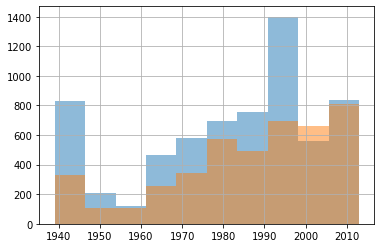

In [58]:
#ax = ipa.ABV.hist(alpha=0.5, bins=12)
#wheat_ales.ABV.hist(ax=ax, alpha=0.5, bins=12)

ax = df_avengers[df_avengers.ALIGN == 'Bad Characters'].Year.hist(alpha=0.5)
df_avengers[df_avengers.ALIGN == 'Good Characters'].Year.hist(ax=ax, alpha=0.5)

#### b. Countries
##### Question
- How many states with sovereignty disputes are recognized by the UN or not recognized by the UN? 

##### What cleaning do I need to do to answer the question
- Filter to states with sovereignty disputes
- Count how many have UN recognition and how many do not

In [80]:
pd.options.display.max_rows = 999

df_states[0][(df_states[0].sovereignty_dispute.notna()) & (df_states[0].un_membership.isna())]

#The six states at the top of the list, from Armenia to South Korea, have UN membership. 
#All states from Abkhazia to Transitria do not, as they are in a table labeled "Other States."

,names,un_membership,sovereignty_dispute,further_information
10,Armenia – Republic of Armenia,NaN,Not recognised by Pakistan.,Armenia is not recognised by Pakistan due to t...
40,China – People's Republic of China[l],NaN,Partially unrecognised. Republic of China,"China contains five autonomous regions, Guangx..."
51,Cyprus – Republic of Cyprus,NaN,Not recognised by Turkey[13],Member of the EU.[c] The northeastern part of ...
92,Israel – State of Israel,NaN,Partially unrecognised,Israel exerts strong control over the territor...
101,"Korea, North – Democratic People's Republic of...",NaN,South Korea,North Korea is not recognised by three UN memb...
102,"Korea, South – Republic of Korea",NaN,North Korea,"South Korea has one autonomous region, Jejudo...."
229,Abkhazia – Republic of Abkhazia,NaN,Georgia,"Recognised by Russia, Nauru, Nicaragua, Syria,..."
230,Artsakh – Republic of Artsakh[ag],NaN,Azerbaijan,"A de facto independent state,[56][57][58] reco..."
234,Northern Cyprus – Turkish Republic of Northern...,NaN,Republic of Cyprus,"Recognised only by Turkey. Under the name ""Tur..."
235,Sahrawi Arab Democratic Republic,NaN,Morocco,Recognised at some stage by 84 UN member state...


#### c. LA homeless housing
##### Question
- Which ZIP codes have the most housing projects? 

##### What cleaning do I need to do to answer the question
- Use regex to search for ZIP code in geoAddress
- Create a new column called ZIP
- Count_values for ZIP
- Also compare those projects that are already approved vs. pending

In [82]:
df_housing.head()

,project_name,address,district_no,units,sh_units,status,lon,lat,geoAddress
0,Reseda Theater Senior Housing (Canby Woods West),7221 N CANBY AVE CA 91335,3,26,13,Already approved,-118.535105,34.201798,"7221 canby ave, reseda, ca 91335, usa"
1,Main Street Apartments,5501 S MAIN ST CA 90037,9,57,56,Already approved,-118.274276,33.992203,"5501 s main st, los angeles, ca 90037, usa"
2,Berendo Sage,1035 S BERENDO ST CA 90006,1,42,21,Already approved,-118.294014,34.051678,"1035 s berendo st, los angeles, ca 90006, usa"
3,South Main Street Apartments,12003 S MAIN ST CA 90061,15,62,61,Already approved,-118.274250,33.923439,"12003 s main st, los angeles, ca 90061, usa"
4,Montecito II Senior Housing,6668 W FRANKLIN AVE HOLLYWOOD CA 90028,13,64,32,Already approved,-118.335282,34.105027,"6668 franklin ave, los angeles, ca 90028, usa"


In [87]:
#df['survey_date'] = df.page_contents.str.extract("ending (\w+ \d+, \d\d\d\d).")

df_housing['zip'] = df_housing.geoAddress.str.extract("(9\d\d\d\d)")

In [94]:
df_housing.zip.value_counts().head(10)

90044    5
90037    4
90014    4
90003    4
90006    3
90029    3
90018    3
90017    3
90061    3
90038    3
Name: zip, dtype: int64

In [97]:
df_housing.groupby('status').zip.value_counts()

status                         zip  
Already approved               90003    3
                               90014    3
                               90017    3
                               90018    3
                               90037    3
                               90038    3
                               90057    3
                               90006    2
                               90007    2
                               90021    2
                               90026    2
                               90028    2
                               90044    2
                               90061    2
                               90073    2
                               91342    2
                               90004    1
                               90019    1
                               90020    1
                               90025    1
                               90029    1
                               90031    1
                               90032   

Take a look at the [LA Times'](https://github.com/datadesk/notebooks) or [FiveThirtyEight's](https://github.com/fivethirtyeight/data) for more practice

## BeautifulSoup
[BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [98]:
# load in the HTML and format for BS
sp_wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [100]:
import requests
from bs4 import BeautifulSoup

In [101]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

response = requests.get(sp_wiki_url, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')

In [103]:
# find the title tag
soup.find("title")

<title>List of S&amp;P 500 companies - Wikipedia</title>

In [104]:
# grab the first a tag
soup.find("a")

<a id="top"></a>

In [106]:
# finds all a tags
pd.options.display.max_rows = 50
soup.find_all("a")

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/S%26P_500" title="S&amp;P 500">S&amp;P 500</a>,
 <a href="/wiki/Stock_market_index" title="Stock market index">stock market index</a>,
 <a href="/wiki/S%26P_Dow_Jones_Indices" title="S&amp;P Dow Jones Indices">S&amp;P Dow Jones Indices</a>,
 <a href="/wiki/Common_stock" title="Common stock">common stocks</a>,
 <a href="/wiki/Market_capitalization" title="Market capitalization">large-cap</a>,
 <a href="/wiki/Dow_Jones_Industrial_Average" title="Dow Jones Industrial Average">Dow Jones Industrial Average</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="#S&amp;P_500_component_stocks"><span class="tocnumber">1</span> <span class="toctext">S&amp;P 500 component stocks</span></a>,
 <a href="#Selected_changes_to_the_list_of_S&amp;P_500_components"><span class="tocnumber">2</span> <span class="toctext

In [112]:
# find all elements with the class "mw-jump-link"
soup.select(".mw-jump-link")

[<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>]

#### Format the first table of the list of S&P 500 companies wiki page as a dataframe

[Traversing the DOM - W3C](https://www.w3.org/wiki/Traversing_the_DOM)

In [133]:
# find where the data you want resides (a tag, class name, etc)

#https://stackoverflow.com/questions/50633050/scrape-tables-into-dataframe-with-beautifulsoup

table = soup.select_one(".wikitable")
df = pd.read_html(str(table))[0]

df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### We can do more cleaning here

In [134]:
df.info()

#CIK' should be an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       454 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [137]:
df.astype({'CIK': 'object'}).dtypes

Symbol                   object
Security                 object
SEC filings              object
GICS Sector              object
GICS Sub-Industry        object
Headquarters Location    object
Date first added         object
CIK                      object
Founded                  object
dtype: object